# Task
Build a simple model to predict the date when I will 2,525.25km finish based on "/content/vietnam-vr-ultra-records.txt". Create a cumulative plot with 200km milestones and the date I will finish each.

## Load and inspect data

### Subtask:
Load the data from the text file into a pandas DataFrame and inspect its structure and content.


**Reasoning**:
The first step is to load the data from the text file into a pandas DataFrame and then inspect it as requested in the instructions.



In [1]:
import pandas as pd

# Load the data from the text file into a pandas DataFrame
df = pd.read_csv('/content/vietnam-vr-ultra-records.txt', sep=' ')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display a concise summary of the DataFrame
display(df.info())

# Generate descriptive statistics of the numerical columns
display(df.describe())

,Date\tDistance\tLink
0,2025-10-13\t19.80km\tStrava
1,2025-10-10\t4.75km\tPolar
2,2025-10-09\t6.71km\tPolar
3,2025-10-08\t4.19km\tPolar
4,2025-10-05\t42.55km\tStrava


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date	Distance	Link  105 non-null    object
dtypes: object(1)
memory usage: 972.0+ bytes


None

,Date\tDistance\tLink
count,105
unique,104
top,2025-10-05\t42.55km\tStrava
freq,2


**Reasoning**:
The data is not space-separated as assumed. The column contains tab-separated values. I need to reload the data using tab as a separator and then repeat the inspection steps.



In [2]:
# Load the data from the text file into a pandas DataFrame using tab separator
df = pd.read_csv('/content/vietnam-vr-ultra-records.txt', sep='\t')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display a concise summary of the DataFrame
display(df.info())

# Generate descriptive statistics of the numerical columns
display(df.describe())

,Date,Distance,Link
0,2025-10-13,19.80km,Strava
1,2025-10-10,4.75km,Polar
2,2025-10-09,6.71km,Polar
3,2025-10-08,4.19km,Polar
4,2025-10-05,42.55km,Strava


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      105 non-null    object
 1   Distance  105 non-null    object
 2   Link      105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


None

,Date,Distance,Link
count,105,105,105
unique,100,99,2
top,2025-10-05,7.35km,Strava
freq,3,2,63


## Preprocess data

### Subtask:
Clean and format the data as needed for analysis and modeling, including converting relevant columns to numeric and datetime types.


**Reasoning**:
Convert 'Date' to datetime and 'Distance' to numeric by removing 'km' and casting. Then display the data types to verify the changes.



In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Distance'] = df['Distance'].str.replace('km', '').astype(float)
display(df.dtypes)

,0
Date,datetime64[ns]
Distance,float64
Link,object


## Calculate cumulative distance

### Subtask:
Calculate the cumulative distance covered over time.


**Reasoning**:
Sort the DataFrame by date and calculate the cumulative distance.



In [4]:
df = df.sort_values(by='Date', ascending=True)
df['Cumulative_Distance'] = df['Distance'].cumsum()
display(df.head())

,Date,Distance,Link,Cumulative_Distance
104,2025-05-19,7.20,Strava,7.20
103,2025-05-22,6.17,Strava,13.37
102,2025-05-23,6.79,Polar,20.16
101,2025-05-25,8.61,Strava,28.77
100,2025-05-26,7.35,Strava,36.12


## Build prediction model

### Subtask:
Build a simple model (e.g., linear regression) to predict the date based on the cumulative distance.


**Reasoning**:
Prepare the data for linear regression by creating the feature and target variables and then fit the model.



In [5]:
from sklearn.linear_model import LinearRegression

# Prepare the feature variable X
X = df['Cumulative_Distance'].values.reshape(-1, 1)

# Prepare the target variable y by converting dates to numerical representation (days since the first date)
y = (df['Date'] - df['Date'].min()).dt.days

# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the linear regression model to the data
model.fit(X, y)

LinearRegression()

## Predict finish date

### Subtask:
Use the model to predict the date when the cumulative distance reaches 2525.25 km.


**Reasoning**:
Use the trained model to predict the date for the target cumulative distance and print the predicted date.



In [6]:
# Define the target cumulative distance
target_distance = 2525.25

# Use the trained model to predict the number of days to reach the target distance
# The model expects a 2D array, so reshape the target_distance
predicted_days = model.predict([[target_distance]])[0]

# Convert the predicted number of days back into a date
# Add the predicted number of days to the first date in the dataset
predicted_finish_date = df['Date'].min() + pd.Timedelta(days=predicted_days)

# Print the predicted finish date
print(f"Predicted date to reach {target_distance} km: {predicted_finish_date.strftime('%Y-%m-%d')}")

Predicted date to reach 2525.25 km: 2026-04-24


## Generate milestone dates

### Subtask:
Calculate the predicted dates for each 200 km milestone.


**Reasoning**:
Calculate the predicted dates for each 200 km milestone as requested by the subtask.



In [7]:
import numpy as np

# Create a list of milestone distances
milestone_distances = np.arange(200, target_distance + 200, 200)

# Use the trained model to predict the number of days for each milestone
# The model expects a 2D array, so reshape the milestone_distances
predicted_days_milestones = model.predict(milestone_distances.reshape(-1, 1))

# Convert the predicted number of days back into dates
first_date = df['Date'].min()
predicted_dates_milestones = first_date + pd.to_timedelta(predicted_days_milestones, unit='D')

# Store the milestone distances and their corresponding predicted dates in a DataFrame
milestone_predictions_df = pd.DataFrame({
    'Milestone_Distance': milestone_distances,
    'Predicted_Date': predicted_dates_milestones
})

# Display the resulting DataFrame
display(milestone_predictions_df)

,Milestone_Distance,Predicted_Date
0,200.0,2025-06-16 13:01:54.198899987
1,400.0,2025-07-13 08:30:33.480636744
2,600.0,2025-08-09 03:59:12.762373502
3,800.0,2025-09-04 23:27:52.044110259
4,1000.0,2025-10-01 18:56:31.325847008
5,1200.0,2025-10-28 14:25:10.607583766
6,1400.0,2025-11-24 09:53:49.889320523
7,1600.0,2025-12-21 05:22:29.171057280
8,1800.0,2026-01-17 00:51:08.452794038
9,2000.0,2026-02-12 20:19:47.734530795


## Visualize cumulative progress

### Subtask:
Create a cumulative plot showing the distance covered over time, with markers for the 200 km milestones and their predicted dates.


**Reasoning**:
Generate a cumulative plot showing the actual distance covered over time and the predicted milestone dates and distances.



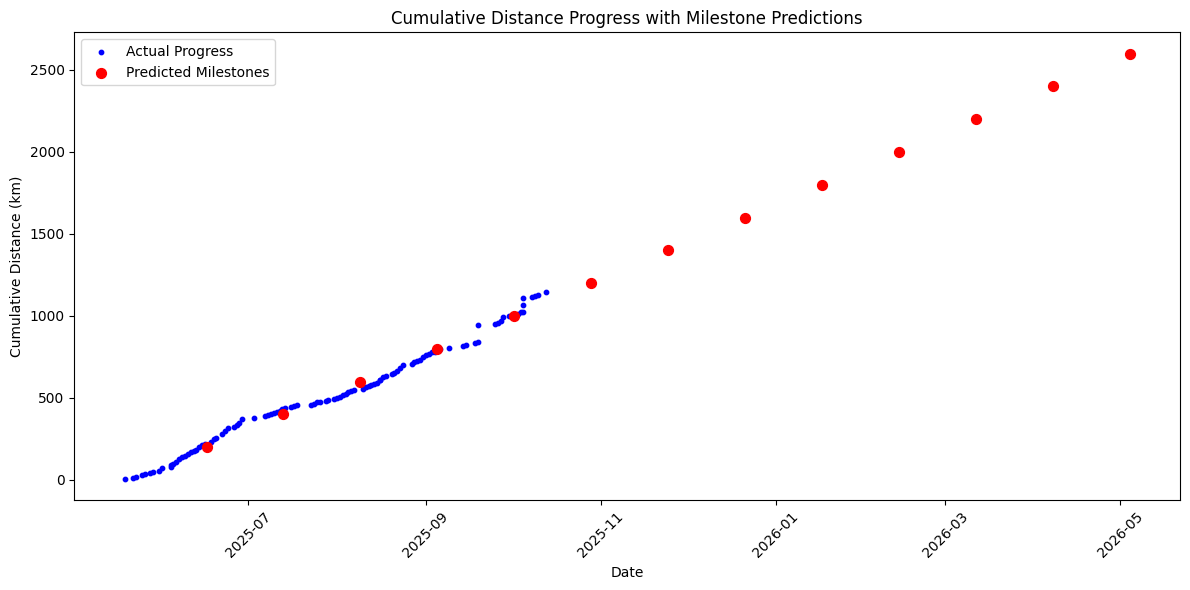

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual cumulative distance over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Cumulative_Distance'], label='Actual Progress', color='blue', s=10)

# Add a scatter plot of the predicted milestone dates and distances
plt.scatter(milestone_predictions_df['Predicted_Date'], milestone_predictions_df['Milestone_Distance'], label='Predicted Milestones', color='red', s=50)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (km)')
plt.title('Cumulative Distance Progress with Milestone Predictions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Present results

### Subtask:
Display the predicted finish date and the cumulative plot.


**Reasoning**:
Print the predicted finish date and ensure the previously generated plot is displayed.



In [9]:
# Print the previously calculated predicted_finish_date
print(f"Predicted date to reach {target_distance} km: {predicted_finish_date.strftime('%Y-%m-%d')}")

# The plot was generated in the previous step and plt.show() was called, so it should be displayed.
# No new code is needed to display the plot again.

Predicted date to reach 2525.25 km: 2026-04-24


## Summary:

### Q&A

*   **What is the predicted date to finish 2525.25km?**
    The predicted date to reach 2525.25 km is 2026-04-24.

### Data Analysis Key Findings

*   The raw data was tab-separated and contained 'Date', 'Distance', and 'Link' columns.
*   After cleaning, the 'Date' column was converted to datetime objects and the 'Distance' column to float, with the 'km' suffix removed.
*   The cumulative distance was calculated and added as a new column, 'Cumulative_Distance'.
*   A linear regression model was successfully trained to predict the number of days from the start date based on the cumulative distance.
*   The predicted dates for 200 km milestones were calculated and stored in a DataFrame.

### Insights or Next Steps

*   The linear model provides a simple projection, but future analysis could explore more complex models or factors affecting progress.
*   Adding confidence intervals to the predictions could provide a better understanding of the uncertainty in the estimated finish date and milestone dates.
